# Research Practicum

This notebook contains a model which uses the max value per hour per day per room.

<b> GET DATA </b>

In [1]:
#import pandas package to read and merge csv files
import pandas as pd
#import csv package for reading from and writing to csv files
import csv
# Import package numpy for numeric computing
import numpy as np
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data from csv file into a data frame
# code is now OS agnostic

import os

a = '..' # removed slash
b = 'cleaned_data' # removed slash
c = 'full.csv'

print(os.path.join(a, b, c))

wifi_df = pd.read_csv(os.path.join(a, b, c), names=['room', 'event_time', 'ass', 'auth'])

../cleaned_data/full.csv


In [3]:
# check data loaded into data frame correctly
wifi_df.head()

,room,event_time,ass,auth
0,Belfield > Computer Science > B-002,Mon Nov 02 20:32:06 GMT+00:00 2015,0,0
1,Belfield > Computer Science > B-002,Mon Nov 02 20:37:10 GMT+00:00 2015,0,0
2,Belfield > Computer Science > B-002,Mon Nov 02 20:42:12 GMT+00:00 2015,0,0
3,Belfield > Computer Science > B-002,Mon Nov 02 20:47:14 GMT+00:00 2015,0,0
4,Belfield > Computer Science > B-002,Mon Nov 02 20:52:11 GMT+00:00 2015,0,0


In [4]:
# check data loaded into data frame correctly
wifi_df.tail()

,room,event_time,ass,auth
12412,Belfield > Computer Science > B-004,Tue Nov 17 11:01:59 GMT+00:00 2015,18,18
12413,Belfield > Computer Science > B-004,Tue Nov 17 11:06:37 GMT+00:00 2015,32,32
12414,Belfield > Computer Science > B-004,Tue Nov 17 11:13:19 GMT+00:00 2015,39,39
12415,Belfield > Computer Science > B-004,Tue Nov 17 11:21:11 GMT+00:00 2015,42,42
12416,Belfield > Computer Science > B-004,Tue Nov 17 11:26:07 GMT+00:00 2015,46,46


<b> CLEAN DATA </b>

Convert timestamp to epoch time.

In [5]:
import time
from dateutil.parser import parse

def convert_to_epoch(df, column):
    '''function that reads in a dataframe with a column containing values in timestamp format and converts those values to epoch forma
   
    requires module time and parse function from dateutil.parser
    
    paramaters
    ----------
    df is a dataframe
    column is a string that denotes the name of the column containing value in timestamp format
    '''
    
    #for loop that iterates through each row in the dataframe
    for i in range(df.shape[0]):
        # variable 'x' is assigned the value from the column and row 'i'
        x = df[column][i]
        # variable 'y' is assigned the result of variable 'x' passed through the parse method 
        y = parse(x)
        # variable 'epoch' is assigned 'y' value converted to epoch time
        epoch = int(time.mktime(y.timetuple()))
        # set column value to value of variable 'epoch'
        df.set_value(i, column, epoch)
    return df

In [6]:
convert_to_epoch(wifi_df, 'event_time')

,room,event_time,ass,auth
0,Belfield > Computer Science > B-002,1446496326,0,0
1,Belfield > Computer Science > B-002,1446496630,0,0
2,Belfield > Computer Science > B-002,1446496932,0,0
3,Belfield > Computer Science > B-002,1446497234,0,0
4,Belfield > Computer Science > B-002,1446497531,0,0
5,Belfield > Computer Science > B-002,1446497831,0,0
6,Belfield > Computer Science > B-002,1446498031,0,0
7,Belfield > Computer Science > B-002,1446498439,0,0
8,Belfield > Computer Science > B-002,1446498740,0,0
9,Belfield > Computer Science > B-002,1446499040,0,0


In [7]:
## Original code used to create convert_to_epoch() function above

#import time
#from dateutil.parser import parse

#for i in range(wifi_log_data.shape[0]):
#    x = wifi_log_data["event_time"][i]
#    y = parse(x)
#    epoch = int(time.mktime(y.timetuple()))
#    wifi_log_data.set_value(i,"event_time",epoch)

Clean Room Identifiers

In [8]:
def room_number(df, room_column):
    '''function that reads in a dataframe with a column containing room information in the format 'campus > building > roomcode-xxx' 
    and replaces the values in the column with just the room ID which is the last character of the string in that column.    
    '''
    # for loop that iterates through each row in the df
    for i in range(df.shape[0]):
        # selects last character of the string in the room_column which is the room ID
        df.set_value(i, room_column, df[room_column][i][-1:])
    return df

In [9]:
room_number(wifi_df, 'room')

,room,event_time,ass,auth
0,2,1446496326,0,0
1,2,1446496630,0,0
2,2,1446496932,0,0
3,2,1446497234,0,0
4,2,1446497531,0,0
5,2,1446497831,0,0
6,2,1446498031,0,0
7,2,1446498439,0,0
8,2,1446498740,0,0
9,2,1446499040,0,0


In [10]:
wifi_df.head()

,room,event_time,ass,auth
0,2,1446496326,0,0
1,2,1446496630,0,0
2,2,1446496932,0,0
3,2,1446497234,0,0
4,2,1446497531,0,0


Add building.

In [11]:
wifi_df['building'] = 'school of computer science'

In [12]:
wifi_df.head()

,room,event_time,ass,auth,building
0,2,1446496326,0,0,school of computer science
1,2,1446496630,0,0,school of computer science
2,2,1446496932,0,0,school of computer science
3,2,1446497234,0,0,school of computer science
4,2,1446497531,0,0,school of computer science


Clean Occupancy Data

In [13]:
# put survey data in a dataframe

a = '..' # removed slash
b = 'cleaned_data' # removed slash
c = 'survey_data.csv'

print(os.path.join(a, b, c))

occupancy_df = pd.read_csv(os.path.join(a, b, c))

../cleaned_data/survey_data.csv


In [14]:
occupancy_df.head()

,Unnamed: 0,room,event_time,occupancy,building
0,0,4,1446454800,0.25,school of computer science
1,1,2,1446454800,0.25,school of computer science
2,2,3,1446454800,0.25,school of computer science
3,3,4,1446458400,0.50,school of computer science
4,4,2,1446458400,0.50,school of computer science


In [15]:
# delete column 'Unnamed: 0'
del occupancy_df['Unnamed: 0']

In [16]:
occupancy_df.head()

,room,event_time,occupancy,building
0,4,1446454800,0.25,school of computer science
1,2,1446454800,0.25,school of computer science
2,3,1446454800,0.25,school of computer science
3,4,1446458400,0.50,school of computer science
4,2,1446458400,0.50,school of computer science


Convert EPCOH time into human-readable format.

In [17]:
# convert 'event_time' values from EPOCH to DATETIME
wifi_df['event_time'] = pd.to_datetime(wifi_df.event_time, unit='s')
# use event_time as dataframe index 
wifi_df.set_index('event_time', inplace=True)

In [18]:
wifi_df.head()

,room,ass,auth,building
event_time,,,,
2015-11-02 20:32:06,2,0,0,school of computer science
2015-11-02 20:37:10,2,0,0,school of computer science
2015-11-02 20:42:12,2,0,0,school of computer science
2015-11-02 20:47:14,2,0,0,school of computer science
2015-11-02 20:52:11,2,0,0,school of computer science


In [19]:
# create two new columns, event_hour and event_day
wifi_df['event_hour'] = wifi_df.index.hour
wifi_df['event_day'] = wifi_df.index.day

In [20]:
wifi_df.head()

,room,ass,auth,building,event_hour,event_day
event_time,,,,,,
2015-11-02 20:32:06,2,0,0,school of computer science,20,2
2015-11-02 20:37:10,2,0,0,school of computer science,20,2
2015-11-02 20:42:12,2,0,0,school of computer science,20,2
2015-11-02 20:47:14,2,0,0,school of computer science,20,2
2015-11-02 20:52:11,2,0,0,school of computer science,20,2


In [21]:
# convert 'event_time' values from EPOCH to DATETIME
occupancy_df['event_time'] = pd.to_datetime(occupancy_df.event_time, unit='s')
# use event_time as dataframe index 
occupancy_df.set_index('event_time', inplace=True)

In [22]:
occupancy_df.head()

,room,occupancy,building
event_time,,,
2015-11-02 09:00:00,4,0.25,school of computer science
2015-11-02 09:00:00,2,0.25,school of computer science
2015-11-02 09:00:00,3,0.25,school of computer science
2015-11-02 10:00:00,4,0.50,school of computer science
2015-11-02 10:00:00,2,0.50,school of computer science


In [23]:
# create two new columns, event_hour and event_day
occupancy_df['event_hour'] = occupancy_df.index.hour
occupancy_df['event_day'] = occupancy_df.index.day

In [24]:
occupancy_df.head()

,room,occupancy,building,event_hour,event_day
event_time,,,,,
2015-11-02 09:00:00,4,0.25,school of computer science,9,2
2015-11-02 09:00:00,2,0.25,school of computer science,9,2
2015-11-02 09:00:00,3,0.25,school of computer science,9,2
2015-11-02 10:00:00,4,0.50,school of computer science,10,2
2015-11-02 10:00:00,2,0.50,school of computer science,10,2


<b> DATA ANALYSIS </b>

Survey data contains one recorded value per room, per day, per hour. Here, we take the max reading per hour, per day, per room.

In [25]:
df_max_conn = wifi_df.groupby(['room', 'event_day', 'event_hour'], as_index=False).min()

In [26]:
df_max_conn.tail()

,room,event_day,event_hour,ass,auth,building
1051,4,17,7,0,0,school of computer science
1052,4,17,8,0,0,school of computer science
1053,4,17,9,6,6,school of computer science
1054,4,17,10,5,5,school of computer science
1055,4,17,11,18,18,school of computer science


In [27]:
# merge data into single dataframe
df_max_conn['room'] = df_max_conn['room'].astype(int)
full_df = pd.merge(df_max_conn, occupancy_df, on=['room', 'event_day', 'event_hour'], how='inner')

full_df.head(15)

,room,event_day,event_hour,ass,auth,building_x,occupancy,building_y
0,2,3,9,0,0,school of computer science,0.00,school of computer science
1,2,3,10,26,26,school of computer science,0.50,school of computer science
2,2,3,11,23,23,school of computer science,0.50,school of computer science
3,2,3,12,3,3,school of computer science,0.50,school of computer science
4,2,3,13,6,6,school of computer science,0.00,school of computer science
5,2,3,14,32,32,school of computer science,0.75,school of computer science
6,2,3,15,29,29,school of computer science,0.25,school of computer science
7,2,3,16,31,30,school of computer science,0.25,school of computer science
8,2,4,9,7,7,school of computer science,0.25,school of computer science
9,2,4,10,10,9,school of computer science,0.25,school of computer science


In [28]:
# add column for number of estimated occupants based on room capacity * occupancy rate

def estimate_occ(df,room, occupancy_rate):
    '''function that caluclates the estimated number of room occupants
    
    parameters
    ----------
    df is a dataframe with columns room and occupancy_rate
    room is a string denoting a column in df that contains INT values representing room IDs
    occupancy_rate is a string denoting a column in df that contains DECIMAL values that represent the estimated room occupancy rate
    
    '''
    #for loop that iterates through each row of the df
    for i in range(df.shape[0]):
        
        #room two and three have capacity of 90
        if df[room][i] == 2 or df[room][i] == 3:
            # calculate estimated occupants for row, assign to variable 'est'
            est = df[occupancy_rate][i] * 90
            #set value in new column
            df.set_value(i, 'est_occupants', est)
        
        #room four has a capcity of 220
        elif df[room][i] == 4:
            est = df[occupancy_rate][i] * 220
            df.set_value(i, 'est_occupants', est)
        
        else:
            raise ValueError('Incorrect room number:', df[room][i])
            

In [29]:
estimate_occ(full_df, 'room', 'occupancy')

In [30]:
full_df.head()

,room,event_day,event_hour,ass,auth,building_x,occupancy,building_y,est_occupants
0,2,3,9,0,0,school of computer science,0.0,school of computer science,0.0
1,2,3,10,26,26,school of computer science,0.5,school of computer science,45.0
2,2,3,11,23,23,school of computer science,0.5,school of computer science,45.0
3,2,3,12,3,3,school of computer science,0.5,school of computer science,45.0
4,2,3,13,6,6,school of computer science,0.0,school of computer science,0.0


In [31]:
# look at correlations for estimated occupants and associated devices
full_df[['ass', 'auth', 'est_occupants']].corr()

,ass,auth,est_occupants
ass,1.000000,0.999770,0.405152
auth,0.999770,1.000000,0.405234
est_occupants,0.405152,0.405234,1.000000


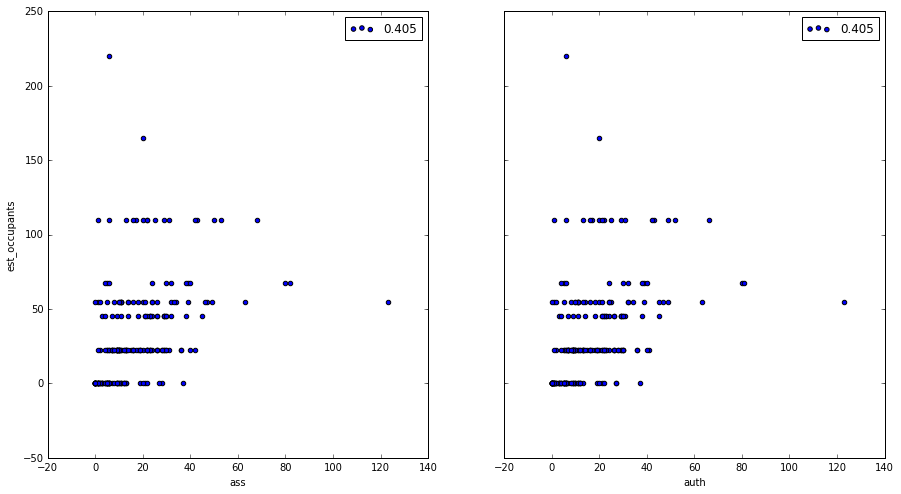

In [32]:
fig, axs = plt.subplots(1, 2, sharey=True)
full_df.plot(kind='scatter', x='ass', y='est_occupants', label='%.3f' 
        % full_df[['ass', 'est_occupants']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
full_df.plot(kind='scatter', x='auth', y='est_occupants', label='%.3f' 
        % full_df[['auth', 'est_occupants']].corr().as_matrix()[0,1], ax=axs[1])

Linear Regression Model

In [33]:
import statsmodels.formula.api as sm

In [34]:
# can also use associated but higher correlation with authenticated 
lm = sm.ols(formula='est_occupants ~ auth', data=full_df).fit()

In [35]:
print(lm.params)

Intercept    18.078131
auth          0.867870
dtype: float64


In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          est_occupants   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     42.05
Date:                Thu, 07 Jul 2016   Prob (F-statistic):           6.07e-10
Time:                        14:29:21   Log-Likelihood:                -1052.4
No. Observations:                 216   AIC:                             2109.
Df Residuals:                     214   BIC:                             2116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.0781      3.126      5.782      0.0

In [37]:
full_df['prediction_max'] = None

for i in range(full_df.shape[0]):
    full_df.set_value(i, 'prediction_max', full_df['auth'][i] * lm.params['auth'])

In [38]:
# add column to dataframe for prediction category
full_df['cat_predict'] = None

In [39]:
def set_occupancy_category(df, room, linear_predict, cat_predict):
    '''function that converts linear predictions to a defined category and updates the dataframe passed through
    
    Parameters
    ----------
    df: a dataframe
    room: a string that is the column in df containing room id values of type INT
    linear_predict: a string that is the column in df containing linear predictions
    cat_predict: a string that is the column in df that will containing category predictions
    
    '''
    
    for i in range(df.shape[0]):
        
        # assign room capacity
        if df[room][i] == 2 or df[room][i] == 3:
            cap = 90
        elif df[room][i] == 4:
            cap = 200
            
        # calculate the occupancy rate and assign to variable 'ratio'
        ratio = df[linear_predict][i]/ cap
        
        # assign category based on ratio
        if ratio < 0.13:
            cat = 0.0
        elif ratio < 0.38:
            cat =  0.25
        elif ratio < 0.5:
            cat =  0.5
        elif ratio < 0.88:
            cat =  0.75
        else:
            cat =  1.0
        
        # set category value in df
        df.set_value(i, cat_predict, cat)

In [40]:
set_occupancy_category(full_df, 'room', 'prediction_max', 'cat_predict')

In [41]:
full_df.head()

,room,event_day,event_hour,ass,auth,building_x,occupancy,building_y,est_occupants,prediction_max,cat_predict
0,2,3,9,0,0,school of computer science,0.0,school of computer science,0.0,0,0
1,2,3,10,26,26,school of computer science,0.5,school of computer science,45.0,22.5646,0.25
2,2,3,11,23,23,school of computer science,0.5,school of computer science,45.0,19.961,0.25
3,2,3,12,3,3,school of computer science,0.5,school of computer science,45.0,2.60361,0
4,2,3,13,6,6,school of computer science,0.0,school of computer science,0.0,5.20722,0


Check accuracy of model according to survey data

In [42]:
full_df['accurate'] = None

for i in range(full_df.shape[0]):
    full_df.set_value(i, 'accurate', 1 if full_df['occupancy'][i] == full_df['cat_predict'][i] else 0)

In [43]:
full_df.head()

,room,event_day,event_hour,ass,auth,building_x,occupancy,building_y,est_occupants,prediction_max,cat_predict,accurate
0,2,3,9,0,0,school of computer science,0.0,school of computer science,0.0,0,0,1
1,2,3,10,26,26,school of computer science,0.5,school of computer science,45.0,22.5646,0.25,0
2,2,3,11,23,23,school of computer science,0.5,school of computer science,45.0,19.961,0.25,0
3,2,3,12,3,3,school of computer science,0.5,school of computer science,45.0,2.60361,0,0
4,2,3,13,6,6,school of computer science,0.0,school of computer science,0.0,5.20722,0,1


In [44]:
accuracy = full_df['accurate'].sum()/full_df.shape[0]
accuracy

0.4861111111111111